# Grocery Dataset Product Image
https://www.kaggle.com/amoghmisra27/grocery

# Get a list of all files and subdirectories

In [28]:
# Import the os module for interacting with the operating system
import os

# Specify the path to the dataset directory for training
path = './dataset/train/'

# Create an empty list to store the file paths
file_list = []

# Iterate through all the directories and files in the specified path
for root, dirs, files in os.walk(path):
    # Uncomment the next three lines to print information about the current root, directories, and files
    print('Root : ', root)
    print('Dirs : ', dirs)
    print('Files : ', files)

    # Iterate through each file in the current directory
    for file in files:
        # Append the full path of each file to the file_list
        file_list.append(os.path.join(root, file))

# Uncomment the next line to print the list of file paths
print(file_list)

# Print the total number of files in the file_list
print(len(file_list))


Root :  ./dataset/train/
Dirs :  ['Apple', 'Asparagus', 'Aubergine', 'Avocado', 'Banana', 'Brown-Cap-Mushroom', 'Cabbage', 'Carrots', 'Cucumber', 'Garlic', 'Ginger', 'Juice', 'Kiwi', 'Leek', 'Lemon', 'Lime', 'Mango', 'Melon', 'Milk', 'Nectarine', 'Oat-Milk', 'Oatghurt', 'Onion', 'Orange', 'Papaya', 'Passion-Fruit', 'Peach', 'Pear', 'Pepper', 'Pineapple', 'Plum', 'Pomegranate', 'Potato', 'Red-Beet', 'Red-Grapefruit', 'Satsumas', 'Sour-Cream', 'Sour-Milk', 'Soy-Milk', 'Soyghurt', 'Tomato', 'Yoghurt', 'Zucchini']
Files :  []
Root :  ./dataset/train/Apple
Dirs :  []
Files :  ['Golden-Delicious_001.jpg', 'Golden-Delicious_002.jpg', 'Golden-Delicious_003.jpg', 'Golden-Delicious_004.jpg', 'Golden-Delicious_005.jpg', 'Golden-Delicious_006.jpg', 'Golden-Delicious_007.jpg', 'Golden-Delicious_008.jpg', 'Golden-Delicious_009.jpg', 'Golden-Delicious_010.jpg', 'Golden-Delicious_011.jpg', 'Golden-Delicious_012.jpg', 'Golden-Delicious_013.jpg', 'Golden-Delicious_014.jpg', 'Golden-Delicious_015.jpg', '

In [29]:
# NIET VOOR MIJN TOEPASSING

# path = './dataset/train/Apple'

# folder_list = []

# for root, dirs, files in os.walk(path):
# #     print('Root : ', root)
# #     print('Dirs : ', dirs)
# #     print('Files : ', files)

#     if len(dirs) > 0:
#         folder_list.append(dirs)

        
# print(folder_list)
# print(len(folder_list))

# Import Library

In [30]:
import numpy as np  
import pandas as pd  

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import glob # to find files recursively

import keras 
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory


In [31]:
# fruits = ['Pineapple' , 'Cocos']
# for x, y in enumerate(fruits):
#     print("X : ", x)
#     print("Y : ", y)

In [32]:
# Create an ImageDataGenerator object for training data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,               # Rescaling the pixel values to the range [0, 1]
    rotation_range=40,             # Range of random rotations for data augmentation (in degrees)
    width_shift_range=0.2,         # Range for horizontal shift as a fraction of total width
    height_shift_range=0.2,        # Range for vertical shift as a fraction of total height
    shear_range=0.2,               # Shear intensity (shear angle in degrees)
    zoom_range=0.2,                # Range for random zoom
    horizontal_flip=True           # Randomly flip images horizontally
)


In [33]:
# Specify the path to the training dataset
train_path = './dataset/train/'
image_size = (224, 224)
batch_size = 32

# Create a data generator for training data using the previously defined ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_path,                      # Path to the training dataset
    batch_size=batch_size,           # Number of samples per batch during training
    class_mode='categorical',        # Type of label assignment ('categorical' for one-hot encoded labels)
    target_size=image_size           # Resize images to the specified dimensions
)


# https://keras.io/api/preprocessing/image/#flowfromdirectory-method

Found 2640 images belonging to 43 classes.


In [34]:
train_generator

In [35]:
# train_generator[1]

In [36]:
# train_generator[0][0][0]

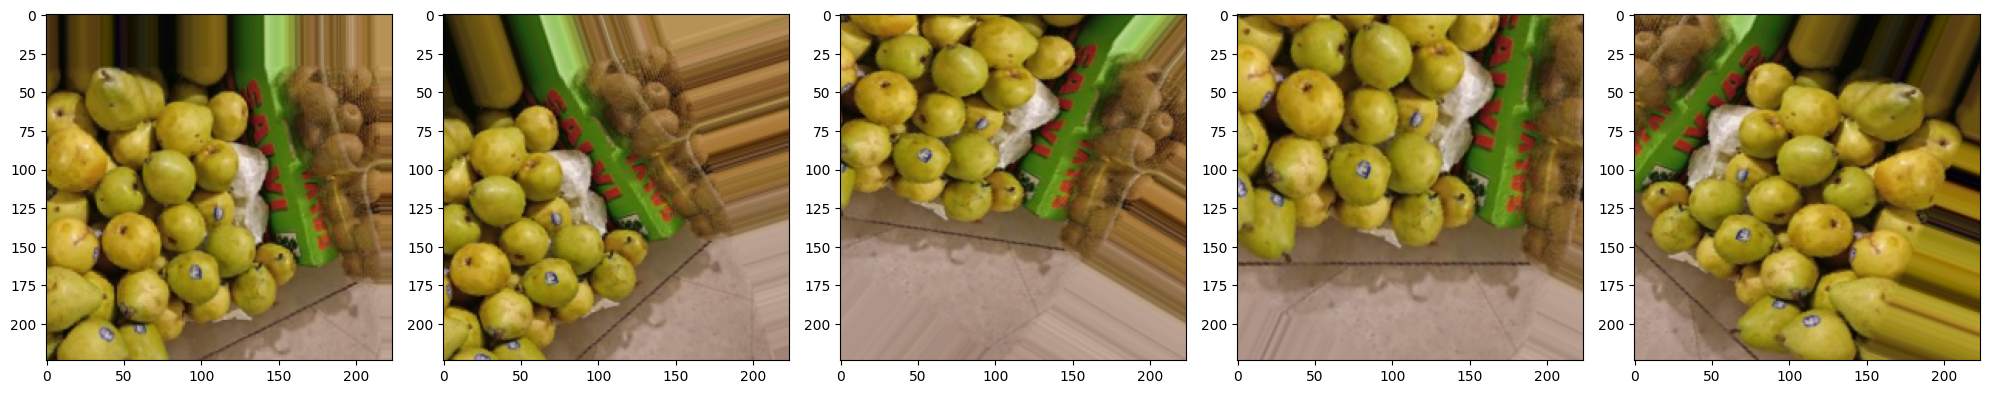

In [37]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [38]:
labels = (train_generator.class_indices)
labels

{'Apple': 0,
 'Asparagus': 1,
 'Aubergine': 2,
 'Avocado': 3,
 'Banana': 4,
 'Brown-Cap-Mushroom': 5,
 'Cabbage': 6,
 'Carrots': 7,
 'Cucumber': 8,
 'Garlic': 9,
 'Ginger': 10,
 'Juice': 11,
 'Kiwi': 12,
 'Leek': 13,
 'Lemon': 14,
 'Lime': 15,
 'Mango': 16,
 'Melon': 17,
 'Milk': 18,
 'Nectarine': 19,
 'Oat-Milk': 20,
 'Oatghurt': 21,
 'Onion': 22,
 'Orange': 23,
 'Papaya': 24,
 'Passion-Fruit': 25,
 'Peach': 26,
 'Pear': 27,
 'Pepper': 28,
 'Pineapple': 29,
 'Plum': 30,
 'Pomegranate': 31,
 'Potato': 32,
 'Red-Beet': 33,
 'Red-Grapefruit': 34,
 'Satsumas': 35,
 'Sour-Cream': 36,
 'Sour-Milk': 37,
 'Soy-Milk': 38,
 'Soyghurt': 39,
 'Tomato': 40,
 'Yoghurt': 41,
 'Zucchini': 42}

In [39]:
labels = dict((v,k) for k,v in labels.items()) 
labels

{0: 'Apple',
 1: 'Asparagus',
 2: 'Aubergine',
 3: 'Avocado',
 4: 'Banana',
 5: 'Brown-Cap-Mushroom',
 6: 'Cabbage',
 7: 'Carrots',
 8: 'Cucumber',
 9: 'Garlic',
 10: 'Ginger',
 11: 'Juice',
 12: 'Kiwi',
 13: 'Leek',
 14: 'Lemon',
 15: 'Lime',
 16: 'Mango',
 17: 'Melon',
 18: 'Milk',
 19: 'Nectarine',
 20: 'Oat-Milk',
 21: 'Oatghurt',
 22: 'Onion',
 23: 'Orange',
 24: 'Papaya',
 25: 'Passion-Fruit',
 26: 'Peach',
 27: 'Pear',
 28: 'Pepper',
 29: 'Pineapple',
 30: 'Plum',
 31: 'Pomegranate',
 32: 'Potato',
 33: 'Red-Beet',
 34: 'Red-Grapefruit',
 35: 'Satsumas',
 36: 'Sour-Cream',
 37: 'Sour-Milk',
 38: 'Soy-Milk',
 39: 'Soyghurt',
 40: 'Tomato',
 41: 'Yoghurt',
 42: 'Zucchini'}

In [40]:
no_classes = len(labels)
no_classes

43

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [42]:
# Create a Sequential model
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3))) # Add a 2D convolutional layer with 16 filters, a 5x5 kernel, ReLU activation, and input shape of (224, 224, 3)
model.add(Dropout(0.25)) # Add a dropout layer with a dropout rate of 0.25 (adjust as needed)
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu')) # Add another 2D convolutional layer with 32 filters and a 5x5 kernel
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu')) # Add another 2D convolutional layer with 64 filters and a 5x5 kernel
model.add(Dropout(0.25)) # Add a dropout layer with a dropout rate of 0.25
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu')) # Add another 2D convolutional layer with 128 filters and a 5x5 kernel
model.add(Flatten()) # Flatten the output to a 1D array
model.add(Dropout(0.5)) # Add a dropout layer with a dropout rate of 0.5
model.add(Dense(16, activation='relu')) # Add a fully connected layer with 16 units and ReLU activation
model.add(Dense(no_classes, activation='softmax')) # Update the output layer to have 43 units for the number of classes and use softmax activation

# Display a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 16)      1216      
                                                                 
 dropout_3 (Dropout)         (None, 220, 220, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 216, 216, 32)      12832     
                                                                 
 conv2d_6 (Conv2D)           (None, 212, 212, 64)      51264     
                                                                 
 dropout_4 (Dropout)         (None, 212, 212, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 208, 208, 128)     204928    
                                                                 
 flatten_1 (Flatten)         (None, 5537792)          

In [43]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy']
             )

# Start training
model.fit(
        train_generator,
        epochs = 10,
        shuffle = False
)

Epoch 1/10


 4/83 [>.............................] - ETA: 26:00 - loss: 39.2412 - accuracy: 0.0781

In [ ]:
# save model to models directory
model.save('./models/grocery-model.h5')

# Test Dataset

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

test_path = './dataset/test/'

test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    batch_size = batch_size,
    class_mode = 'categorical',
    target_size = image_size,
    shuffle = False,
    seed = 42
)    

Found 2485 images belonging to 43 classes.


In [ ]:
pred = model.predict_generator(
    test_generator,
    verbose=1
)

78/78 [==============================] - 12s 157ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
predictions

['Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',
 'Fruit',


In [ ]:
# augmented_images = [test_generator[0][0][0] for i in range(10)]
# plotImages(augmented_images)

In [ ]:
filenames = test_generator.filenames
results = pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
results.head()
# ipv fruit/vegetables/packages moet dit de naam van het product zijn zoals apple, banana, etc.

,Filename,Predictions
0,Fruit/Apple/Golden-Delicious/Golden-Delicious_...,Fruit
1,Fruit/Apple/Golden-Delicious/Golden-Delicious_...,Fruit
2,Fruit/Apple/Golden-Delicious/Golden-Delicious_...,Fruit
3,Fruit/Apple/Golden-Delicious/Golden-Delicious_...,Fruit
4,Fruit/Apple/Golden-Delicious/Golden-Delicious_...,Fruit


In [ ]:
results.tail()
# ipv fruit/vegetables/packages moet dit de naam van het product zijn zoals apple, banana, etc.

,Filename,Predictions
2480,Vegetables/Zucchini/Zucchini_025.jpg,Fruit
2481,Vegetables/Zucchini/Zucchini_026.jpg,Fruit
2482,Vegetables/Zucchini/Zucchini_027.jpg,Fruit
2483,Vegetables/Zucchini/Zucchini_028.jpg,Fruit
2484,Vegetables/Zucchini/Zucchini_029.jpg,Fruit
